# Marketing analysis

**The overall goal of this project:**

As a marketing analyst, I need to analyze a data set to understand the problem of recent underperforming marketing campaigns and come up with data-driven solutions.

To achieve the goal, the notebook was divided into three parts with more detailed questions in each.

1. **Exploratory Data Analysis (EDA)**
* Are there any null values or outliers? How to handle them?
* Are there any columns that need to be transformed?
* Are there any useful for further analysis variables that can be calculated?
* Are there any patterns or anomalies in the data?

2. **Statistical Analysis**

In this part statistical tests will be run, findings will be interpret in non-statistical verse.

* What factors are related to the number of store purchases?
* Does US significantly better than the rest of the World by total purchases?
* Supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Confirm or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly correlated to amount spent on fish?
* Are there any significant correlations between geographical regions and success of campaigns?

3. **Data Visualization**

Each question will be answered in the form of plotting and/or visualizing.

* Which marketing campaign is most successful?
* What does the average client look like?
* Which products are performing most effective?
* Which channels are underperforming?

Before beginning the analysis, the dataset was load, viewed and performed initial cleaning.

View the dataset info:

In [6]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 12.4 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=8a8fb05be295b1e7334a13a65e30bc3030698898ba8616fd778765c48e541d11
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

In [7]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 12.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')
import plotly.express as px

In [9]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [11]:
df.shape

(2240, 28)

In [12]:
# clean up column names that contain whitespace and lowercase all of them
list_of_columns = list(df.columns.str.replace(' ', ''))
df.columns = list(map(lambda x: x.lower(), list_of_columns))

# transform Income column to a float
df['income'] = df['income'].str.replace('$', '', regex=False)
df['income'] = df['income'].str.replace(',', '', regex=False).astype('float')

In [13]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Exploratory Data Analysis (EDA)

### Are there any null values or outliers? How to handle them?

In [14]:
df.isnull().sum().sort_values(ascending=False)

income                 24
id                      0
numdealspurchases       0
complain                0
response                0
acceptedcmp2            0
acceptedcmp1            0
acceptedcmp5            0
acceptedcmp4            0
acceptedcmp3            0
numwebvisitsmonth       0
numstorepurchases       0
numcatalogpurchases     0
numwebpurchases         0
mntgoldprods            0
year_birth              0
mntsweetproducts        0
mntfishproducts         0
mntmeatproducts         0
mntfruits               0
mntwines                0
recency                 0
dt_customer             0
teenhome                0
kidhome                 0
marital_status          0
education               0
country                 0
dtype: int64

`income` contains 24 null values. Let's plot this column.

* Most incomes are distributed between `$0`-`$100,000`, with a few outliers
* As a solution, null values will be replaced with median value, to avoid effects of outliers.

Text(0, 0.5, 'count')

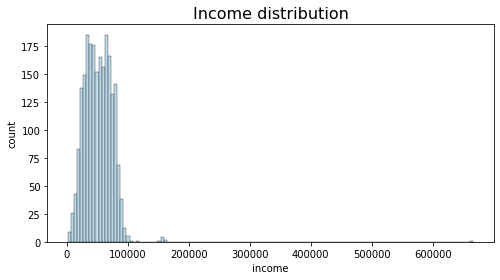

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['income'])
plt.title('Income distribution', size=16)
plt.ylabel('count')

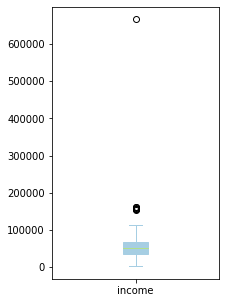

In [16]:
df['income'].plot(kind='box', figsize=(3,5), patch_artist=True)
plt.show()

In [17]:
df['income'] = df['income'].fillna(df['income'].median())

Multiple features contain outliers, in the `year_birth` values that are more less than 1900 will be removed

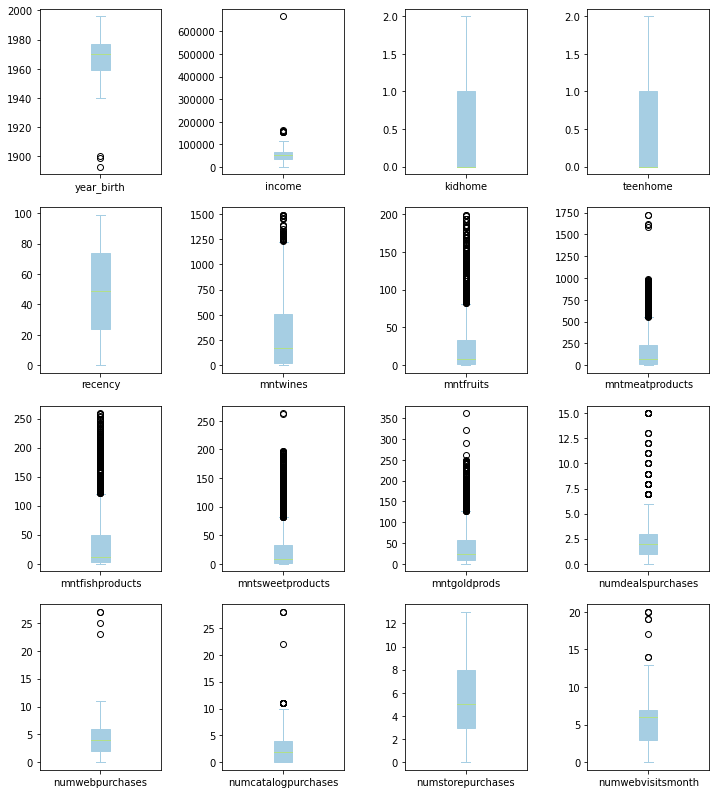

In [18]:
dfs_to_plot = df.drop(columns=['id', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 
                               'acceptedcmp5', 'response', 'complain']).select_dtypes(include=np.number)

dfs_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
plt.show()

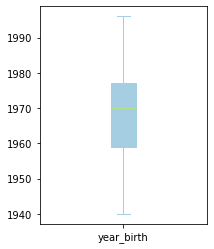

In [19]:
# remove rows where year_birth <= 1900:
df = df[df['year_birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['year_birth'].plot(kind='box', patch_artist=True)
plt.show()

### Are there any columns that need to be transformed?

`dt_customer` column should be transformed to datetime format

In [20]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2237 non-null   int64         
 1   year_birth           2237 non-null   int64         
 2   education            2237 non-null   object        
 3   marital_status       2237 non-null   object        
 4   income               2237 non-null   float64       
 5   kidhome              2237 non-null   int64         
 6   teenhome             2237 non-null   int64         
 7   dt_customer          2237 non-null   datetime64[ns]
 8   recency              2237 non-null   int64         
 9   mntwines             2237 non-null   int64         
 10  mntfruits            2237 non-null   int64         
 11  mntmeatproducts      2237 non-null   int64         
 12  mntfishproducts      2237 non-null   int64         
 13  mntsweetproducts     2237 non-nul

### Are there any useful for further analysis variables that can be calculated?

Features that can be and will be calculated:
* Date (year) of first purchase (`first_year_customer`) from `dt_Customer`
* Total spent amount (`total_mnt`): sum of all features with the word 'mnt'
* Total number of purchases (`total_purchases`): sum of all features with the word 'purchases'
* Total number of campains accepted (`total_campaigns`): sum of all features with the words 'cmp' and 'response'
* Total number of dependents in the home (`dependents`): sum of `kidhome` and `teenhome`

In [22]:
df['first_year_customer'] = pd.DatetimeIndex(df['dt_customer']).year

mnt_cols = [col for col in df.columns if 'mnt' in col]
df['total_mnt'] = df[mnt_cols].sum(axis=1)

purchases_cols = [col for col in df.columns if 'purchases' in col]
df['total_purchases'] = df[purchases_cols].sum(axis=1)

campaigns_cols = [col for col in df.columns if 'cmp' in col] + ['response']
df['total_campaigns'] = df[campaigns_cols].sum(axis=1)

df['dependents'] = df['kidhome'] + df['teenhome']

df[['id', 'first_year_customer', 'total_mnt', 'total_purchases', 'total_campaigns', 'dependents']].head()

,id,first_year_customer,total_mnt,total_purchases,total_campaigns,dependents
0,1826,2014,1190,15,1,0
1,1,2014,577,18,2,0
2,10476,2014,251,11,0,1
3,1386,2014,11,4,0,2
4,5371,2014,91,8,2,1


### Are there any patterns or anomalies in the data?

Through inspecting correlations patterns will be identified. Positive correlations painted red, negative correlations - blue, and no correlation painted grey in the clustered heatmap below.

**Patterns and clusters:**
1. The "High Income" cluster:

* Amount spent (`total_mnt` and other 'mnt' features) and number of purchases (`total_purchases` and other 'purchases' features) are positively correlated with `income`
* Purchasing in store (`numstorepurchases`), on the web (`numwebpurchases`), or via the catalog (`numcatalogpurchases`) is positively correlated with `income`

2. The "Have Kids & Teens" cluster:

* Amount spent (`total_mnt` and other 'mnt' features) and number of purchases (`total_purchases` and other 'purchases' features) are negatively correlated with `dependents`
* Purchasing deals (`numdealspurchases`) is positively correlated with `dependents` (kids and/or teens) and negatively correlated with `income`

3. The "Advertising Campaigns" cluster:

* Acceptance of the advertising campaigns (`acceptedcmp` and `response`) are strongly positively correlated with each other
* Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster

**Anomalies:**
* Remarkably, the number of website visits in the last month (`numwebvisitsmonth`) does not correlate with an increased number of web purchases (`numwebpurchases`)
* However, `numwebvisitsmonth` is positively correlated with the number of deals purchased (`numdealspurchases`), maybe suggesting deals are an effective way of stimulating purchases on the website

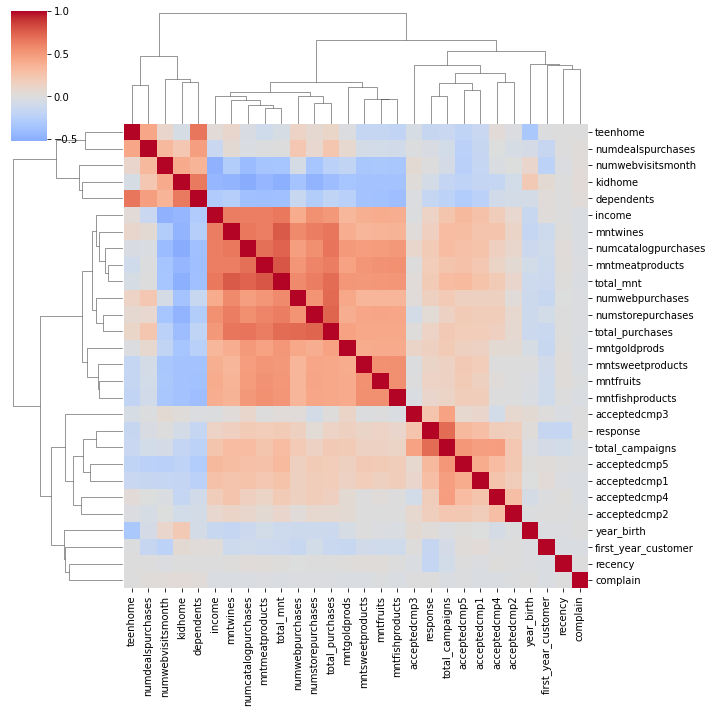

In [23]:
# calculate correlation matrix
## using non-parametric test of correlation (Kendall), since some features are binary
corrs = df.drop(columns='id').select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cmap='coolwarm', center=0)
plt.show()

Plot shows the effect of higher income on spendings. Also outliers were removed limiting income to < 200,000

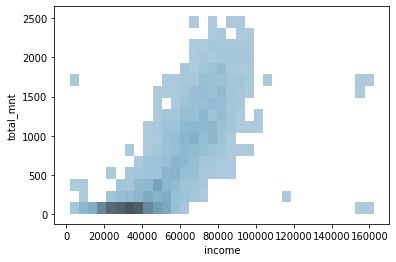

In [24]:
sns.histplot(data=df[df['income'] < 200000], x='income', y='total_mnt')
plt.show()

Negative effect of having dependents (kids, teens) on spendings was illustrated

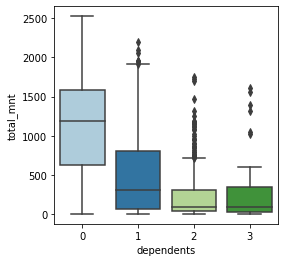

In [25]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x='dependents', y='total_mnt')
plt.show()

Next plot illustrates positive effect of having dependents(kids, teens) on number of deals

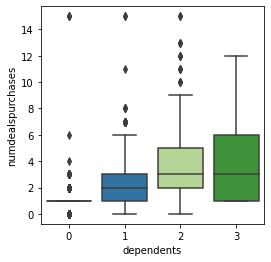

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x='dependents', y='numdealspurchases')
plt.show()

Plots illustrate the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance
(outliers were removed limiting income to < 200,000)

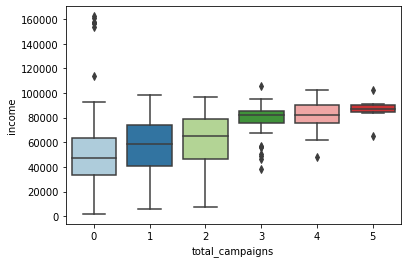

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[df['income']<200000], x='total_campaigns', y='income')
plt.show()

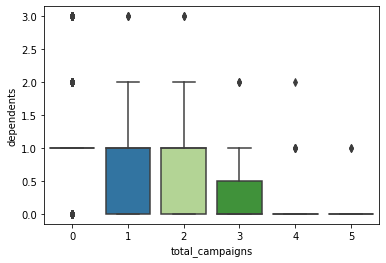

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='total_campaigns', y='dependents')
plt.show()

About anomaly, number of web visits in the last month is not positively correlated with number of web purchases

Nevertheless, it is positively correlated with the number of deals purchased, suggesting that deals is effective way of rising purchases on the website

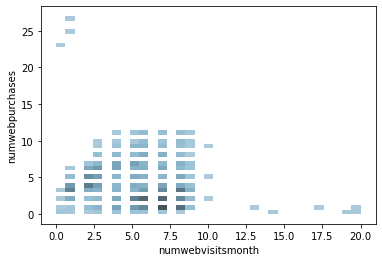

In [29]:
sns.histplot(data=df, x='numwebvisitsmonth', y='numwebpurchases')
plt.show()

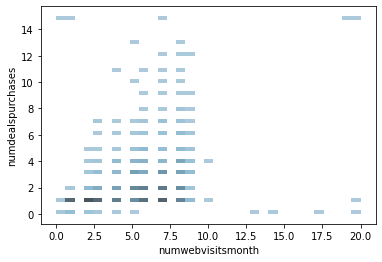

In [30]:
sns.histplot(data=df, x='numwebvisitsmonth', y='numdealspurchases')
plt.show()

## Statistical Analysis

### What factors are related to the number of store purchases?

To answer the question linear regression model will be used with `numstorepurchases` as the target variable.

After that machine learning explainability techniques will be applied to get insights about which factors predict the number of store purchases.

Let's start by plotting `numstorepurchases`:

In [31]:
def freedman_diaconis(data, returnas="width"):
    from scipy import stats
    data = np.asarray(data, dtype=np.float_)
    IQR = stats.iqr(data, rng=(25, 75), scale=1.0, nan_policy="omit")
    N = data.size
    bw = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)
NBR_BINS = freedman_diaconis(df['numstorepurchases'], returnas="bins")

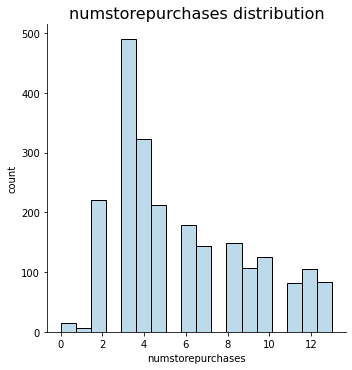

In [32]:
sns.displot(df['numstorepurchases'], bins=NBR_BINS)
plt.title('numstorepurchases distribution', size=16)
plt.ylabel('count')
plt.show()

For further analysis uninformative features will be dropped (`id` is unique to each customer, `dt_customer` because `year_customer` will be used)

Next, perform **one-hot encoding of categorical features**

In [33]:
df.drop(columns=['id', 'dt_customer'], inplace=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 education         5
marital_status    8
country           8
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,first_year_customer,total_mnt,total_purchases,total_campaigns,dependents
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,2014,1190,15,1,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,1,0,2014,577,18,2,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,2014,251,11,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2014,11,4,0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,2014,91,8,2,1


Then fit linear regression model to training data (70% of dataset), after that, evaluate predictions on test data (30% of dataset) using **RMSE** (root-mean-square error)

The resulting RMSE is extremely small compared to the mean of our target variable, showing good model predictions.

In [36]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns='numstorepurchases')
y = df2['numstorepurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.19360712671688e-14
Median value of target variable:  5.0


Let's identify features that significantly affect the number of store purchases:

* `total_purchases`
* `numcatalogpurchases`
* `numwebpurchases`
* `numdealspurchases`

Other features don't relate to the number of store purchases

In [37]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

Next step is exploring the directionality of received features, using SHAP valuesb

* The number of store purchases **increases** with higher number of total purchases (`total_purchases`)

* The number of store purchases **decreases** with higher number of catalog, web, or deals purchases (`numcatalogpurchases`, `numwebpurchases`, `numdealspurchases`)

As a result, customers who shop the most in stores are those who shop less via the catalog, website, or special deals

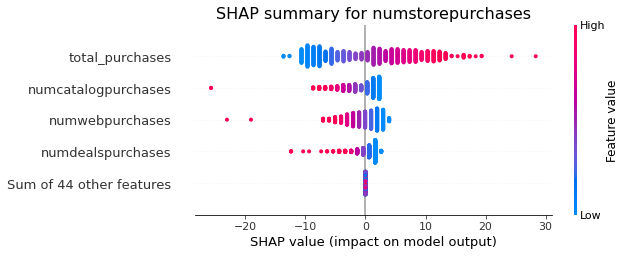

In [38]:
import shap

ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for numstorepurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5)

### Does US fare significantly better than the Rest of the World in terms of total purchases?

You can see below that **Spain** (SP) has the highest number of purchases

**US** is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

In [39]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

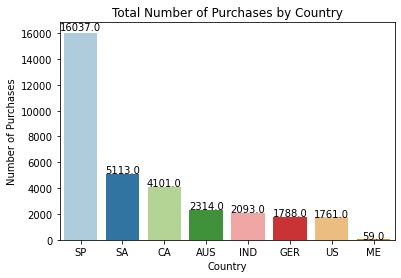

In [40]:
df_purch_country = df.groupby('country')['total_purchases'].sum().sort_values(ascending=False).to_frame().reset_index()

ax = sns.barplot(data=df_purch_country, x='country', y= 'total_purchases')
ax.set(xlabel='Country',
       ylabel='Number of Purchases',
       title='Total Number of Purchases by Country')
show_values(ax, "v")

Also **Spain** (SP) has the highest total amount spent on purchases
**US** is second to last, so again the US does not fare better than the rest of the world in terms of the total amount spent on purchases

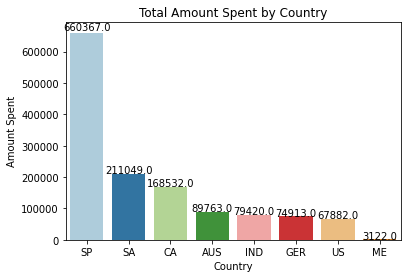

In [41]:
df_spent_country = df.groupby('country')['total_mnt'].sum().sort_values(ascending=False).to_frame().reset_index()

ax = sns.barplot(data=df_spent_country, x='country', y='total_mnt')
ax.set(xlabel='Country',
       ylabel='Amount Spent',
       title='Total Amount Spent by Country')
show_values(ax, "v")

### Supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Confirm or refute this statement using an appropriate statistical test

To start let's plot relationship between amount spent on gold in the last 2 years (`mntgoldprods`) and number of in store purchases (`numstorepurchases`)

There is a seen positive relationship, the next step is to study whether it is significant

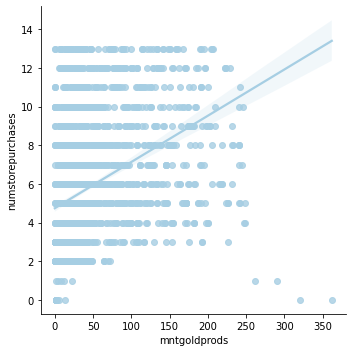

In [42]:
sns.lmplot(data=df, x='mntgoldprods', y='numstorepurchases')
plt.show()

Further Kendall correlation analysis will be performed (non-parametric test since `mntgoldproducts` is not normally distributed and contains outliers)

You can see below significant positive correlation between `mntgoldprods` and `numstorepurchases`

In [43]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['mntgoldprods'], y=df['numstorepurchases'])

print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


### Fish has Omega 3 fatty acids which are good for the brain. Do "Married PhD candidates" have a significant relation with amount spent on fish?

Let's compare `mntfishproducts` between Married PhD candidates and all other customers:

Married PhD candidates spend **significantly less** on fish products compared to other customers.

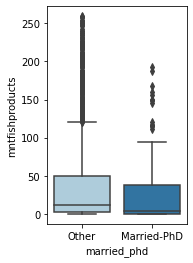

In [44]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['married_phd'] = df2['marital_status_Married'] + df2['education_PhD']
df2['married_phd'] = df2['married_phd'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

plt.figure(figsize=(2.5,4))
sns.boxplot(data=df2, x='married_phd', y='mntfishproducts')
plt.show()

In [45]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['married_phd'] == 'Married-PhD']['mntfishproducts'], 
                 df2[df2['married_phd'] == 'Other']['mntfishproducts']).pvalue
print("T-test p-value: ", round(pval, 3))

T-test p-value:  0.005


In [46]:
# to include only the original variables in the analysis drop married_phd column 
df2.drop(columns='married_phd', inplace=True)

### What other factors are significantly related to amount spent on fish?

As well as with the analysis of `numstorepurchases` above, linear regression model with `mntfishproducts` as the target variable will be used, and then machine learning explainability techniques to get insights about which features predict the amount spent on fish will be applied

In [47]:
NBR_BINS = freedman_diaconis(df['mntfishproducts'], returnas="bins")

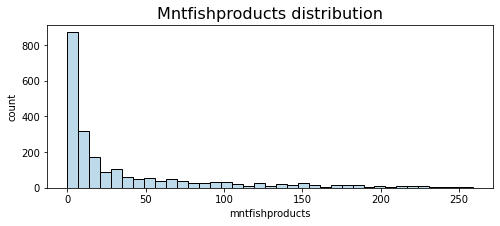

In [48]:
# plotting the target variable
plt.figure(figsize=(8,3))
sns.histplot(df['mntfishproducts'], bins=NBR_BINS)
plt.title('Mntfishproducts distribution', size=16)
plt.ylabel('count')
plt.show()

Next, fit linear regression model to training data (70% of dataset) and evaluate predictions on test data (30% of dataset) using **RMSE**

The RMSE is highly small compared to the mean of the target variable, showing good model predictions.

In [49]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns='mntfishproducts')
y = df2['mntfishproducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.87763980468997e-13
Median value of target variable:  12.0


Let's underline features that significantly affect the amount spent on fish, using **permutation importance**:

* 'total_mnt'
* 'mntwines'
* 'mntmeatproducts'
* 'mntgoldprods'
* 'mntsweetproducts'
* 'mntfruits'

Other features are not significant.

In [50]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Next, let's explore the directionality of these effects, using SHAP values

* The amount spent on fish **increases** with higher total amount spent (`total_mnt`)
* The amount spent on fish **decreases** with higher amounts spent on wine, meat, gold, fruit, or sweets (`mntwines`, `mntmeatproducts`, `mntgoldprods`, `mntsweetproducts`, `mntfruits`)

As a conculsion - customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

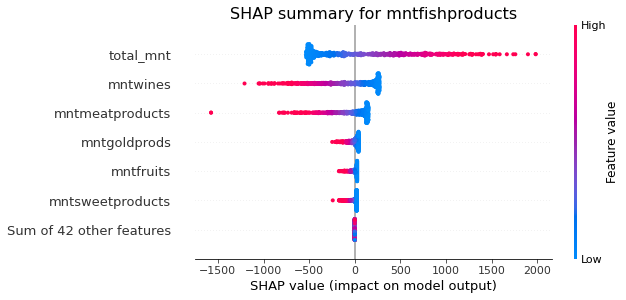

In [51]:
# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for mntfishproducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

### Are there any significant correlations between geographical regions and success of campaigns?

The campaign's acceptance rates are low overall

The campaign with the highest overall acceptance rate is the most **recent campaign** (`response`)

The country with the highest acceptance rate in any campaign is **Mexico**

In [52]:
df['country_code'] = df['country'].replace({'SP': 'ESP', 
                                            'CA': 'CAN', 
                                            'US': 'USA', 
                                            'SA': 'ZAF', 
                                            'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['country_code', 'acceptedcmp1', 
             'acceptedcmp2', 'acceptedcmp3', 
             'acceptedcmp4', 'acceptedcmp5', 
             'response']].melt(
                id_vars='country_code', 
                var_name='campaign', 
                value_name='accepted(%)')

df_cam = pd.DataFrame(df_cam.groupby(['country_code', 
                                      'campaign'])['accepted(%)'].mean() * 100).reset_index(drop=False)

# rename the campaign variables
df_cam['campaign'] = df_cam['campaign'].replace({'acceptedcmp1': '1',
                                                'acceptedcmp2': '2',
                                                'acceptedcmp3': '3',
                                                'acceptedcmp4': '4',
                                                'acceptedcmp5': '5',
                                                 'response': 'recent'
                                                })

fig = px.choropleth(df_cam, locationmode='ISO-3', color='accepted(%)', 
                    facet_col='campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, 
                    width=700, locations='country_code', 
                    projection='natural earth', 
                    title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

Let's calculate statistical summary of regional effects on campaign success.

To do that logistic regression for campaign accepted by country will be proviede, reporting Chisq p-value for overall model.

As the result we can say, that the regional differences in advertising campaign success are statistically significant.

In [53]:
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

df_cam_wide = df[['country', 
                  'acceptedcmp1', 
                  'acceptedcmp2', 
                  'acceptedcmp3', 
                  'acceptedcmp4', 
                  'acceptedcmp5', 
                  'response']]

stat_results = []

# perform glm
for col in df_cam_wide.drop(columns='country').columns:
    this_data = df_cam_wide[['country', col]]
    
    formula = col+'~country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7)
     
    stat_results.append(pval)
    
    print(result.summary())
    
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           acceptedcmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Fri, 24 Feb 2023   Deviance:                       1065.0
Time:                        10:01:11   Pearson chi2:                 2.23e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

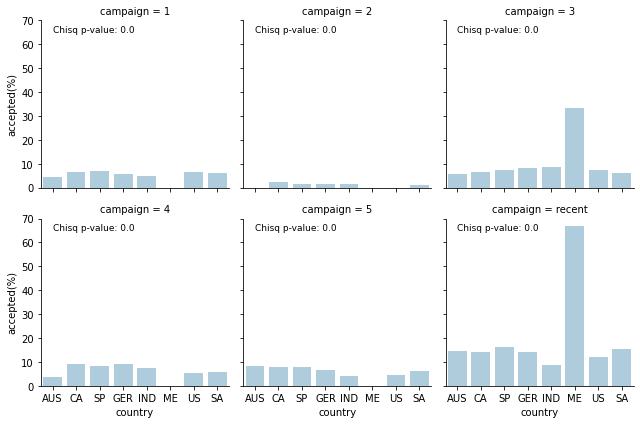

In [54]:
# plot
# merge in the original country codes provided in the dataset
countries = df[['country', 'country_code']].drop_duplicates().reset_index(drop=True)
df_cam2 = df_cam.merge(countries, how='left', on='country_code')
df_cam2.head()

graph = sns.FacetGrid(df_cam2, col='campaign', col_wrap=3)
graph.map(sns.barplot, 'country', 'accepted(%)', order=None)
for ax, pval in zip(graph.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=9)

## Data Visualization

### Which marketing campaign is most successful?

First of all, let's plot marketing campaign overall acceptance rates

We see that the most successful campaign is the most recent - `response`

Text(0.5, 1.0, 'Marketing campaign success rate')

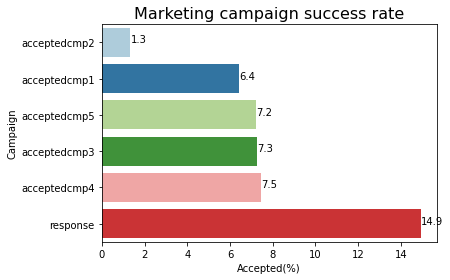

In [55]:
# calculate success rate 
cam_success = pd.DataFrame(df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 
                               'acceptedcmp4', 'acceptedcmp5', 'response']].mean()*100, 
                           columns=['mean_percent']).reset_index()

ax = sns.barplot(data=cam_success.sort_values('mean_percent'), x='mean_percent', y='index')
ax.set(xlabel='Accepted(%)', ylabel='Campaign')
show_values(ax, "h", space=0)
plt.title('Marketing campaign success rate', size=16)

### What does the average customer look like for this company?

By basic demographics **the average customer ...**
* was born in 1969
* became a customer in 2013
* has an income of roughly $52,200 per year
* has 1 dependent (kid or teen)
* made a purchase from company in the last 49 days

In [56]:
binary_cols = [col for col in df.columns if 'accepted' in col] + ['response', 'complain']

mnt_cols = [col for col in df.columns if 'mnt' in col]

channel_cols = [col for col in df.columns if 'num' in col] + ['total_purchases', 'total_campaigns']

cols_name = binary_cols + mnt_cols + channel_cols

In [57]:
df_customer = df.drop(columns=cols_name).mean(numeric_only=True)

demographics = pd.DataFrame(round(df_customer, 1), 
                            columns=['average']).reindex([
    'year_birth', 'first_year_customer', 
    'income', 'dependents', 'recency'])

demographics

,average
year_birth,1968.9
first_year_customer,2013.0
income,52227.4
dependents,1.0
recency,49.1


### Which products are performing the best?

**The average customer spent...**
* $26-27 on Fruits and Sweets products
* $37-44 on Fish and Gold products
* Approximately $166 on Meat products
* Approximately $304 on Wines
* Approximately $600 in total

**Products performing best:**
* Wines
* Meats

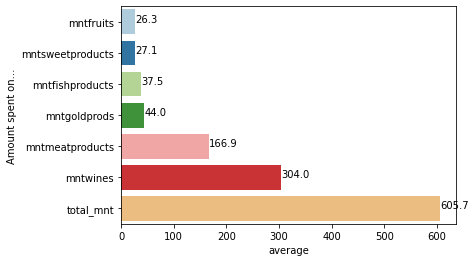

In [58]:
spending = pd.DataFrame(round(df[mnt_cols].mean(numeric_only=True), 1), columns=['average']).sort_values(by='average').reset_index()

ax = sns.barplot(data=spending, x='average', y='index')
ax.set(ylabel='Amount spent on...')
show_values(ax, "h", space=0)

### Which channels are underperforming?

**The average customer...**
* Accepted less than 1 advertising campaign
* Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
* Averaged 14 total purchases
* Visited the website 5 times

**Underperforming channels:**
* Advertising campaigns
* Followed by deals, and catalog

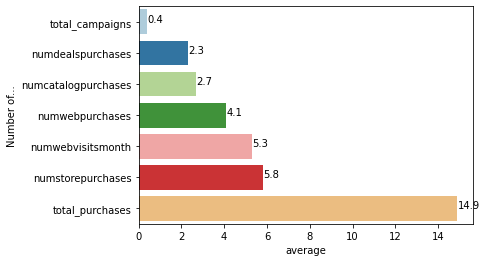

In [59]:
channels = pd.DataFrame(round(df[channel_cols].mean(numeric_only=True), 1), columns=['average']).sort_values(by='average').reset_index()

ax = sns.barplot(data=channels, x='average', y='index')
ax.set(ylabel='Number of...')
show_values(ax, "h", space=0)

## Conclusion

**Overall findings and ways to improve advertising campaign effectiveness:**

1.   The most successful advertising campaign was the most recent campaign, and especially in Mexico (**>60%** acceptance rate)
> **Suggested action:** future advertising campaigns may be conducted using the latest model recently implemented in Mexico

2.   Advertising campaign acceptance is positively correlated with income and negatively correlated with having decedents (kids/teen)
> **Suggested action:** to make two target advertising campaigns: one aimed at high-income individuals without decedents and second aimed at lower-income individuals with kids/teens

3. The average customer spent the most on wines and meats
> **Suggested action:** to direct next advertising campaigns for raise sales of the less popular items

4. The inefficient channels are deals and catalog purchases, the best performing channels are web and store purchases
> **Suggested action:** to focus advertising campaigns on successful channels, and to find another ways of advertising in inefficient channels